<a href="https://colab.research.google.com/github/bagindawilliams/Tabular-Data-Processing/blob/main/UTS_Pembelajaran_Mendalam_untuk_Teknik_Elektro_Soal_1_Baginda_Miraj_Williamsyah_201012320010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
# Tahap 1: Memuat dataset Heart Disease

import pandas as pd

# URL dataset Heart Disease (download file CSV dari sumber yang diberikan)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Memuat dataset ke dalam DataFrame
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(url, header=None, names=column_names)

# Menampilkan 5 baris pertama dataset
print("Dataset Loaded Successfully")
print(data.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(data.info())

# Statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif Dataset:")
print(data.describe())


Dataset Loaded Successfully
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  

# Pre-Processing Data

Cek Nilai Kosong pada Dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Setelah mengganti '?' dengan NaN:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Setelah Penanganan Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<ipython-input-89-57c1aaf9e262>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ca'].fillna(data['ca'].median(), inplace=True)
<ipython-input-89-57c1aaf9e262>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

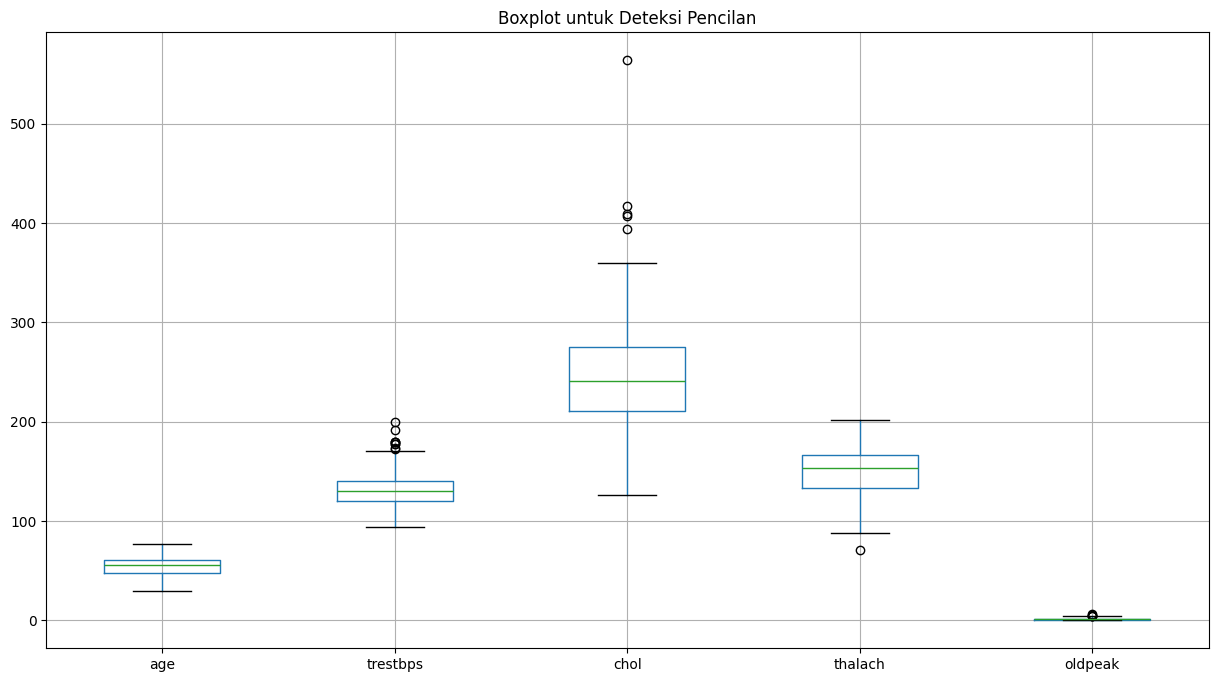


Dataset Setelah Penanganan Pencilan:
              age         sex          cp    trestbps        chol         fbs  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean    54.070423    0.697183    3.133803  129.982394  242.535211    0.140845   
std      9.118883    0.460288    0.963862   15.450927   44.730155    0.348476   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    2.750000  120.000000  210.750000    0.000000   
50%     55.000000    1.000000    3.000000  130.000000  239.500000    0.000000   
75%     60.000000    1.000000    4.000000  140.000000  271.000000    0.000000   
max     77.000000    1.000000    4.000000  170.000000  360.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean     0.978873  150.000000    0.316901    0.948592    1.570423    0

In [ ]:
# Tahap 2: Preprocessing Data

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identifikasi data kosong
print("Cek Nilai Kosong pada Dataset:")
print(data.isnull().sum())

# Ubah nilai '?' menjadi NaN agar terdeteksi sebagai nilai kosong
data.replace('?', np.nan, inplace=True)

# Periksa kembali missing values setelah konversi
print("\nSetelah mengganti '?' dengan NaN:")
print(data.isnull().sum())

# 2. Penanganan Data Kosong
# Kolom 'ca' dan 'thal' memiliki missing values
# Mengganti missing values dengan nilai median (karena data numerik)
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)

data['ca'].fillna(data['ca'].median(), inplace=True)
data['thal'].fillna(data['thal'].median(), inplace=True)

# Verifikasi bahwa missing values telah ditangani
print("\nSetelah Penanganan Missing Values:")
print(data.isnull().sum())

# 3. Deteksi dan Penanganan Pencilan
# Visualisasi boxplot untuk mendeteksi pencilan pada fitur numerik
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 8))
data[numeric_columns].boxplot()
plt.title("Boxplot untuk Deteksi Pencilan")
plt.show()

# Penanganan pencilan dengan metode IQR
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Menghapus pencilan
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Periksa kembali data setelah penanganan pencilan
print("\nDataset Setelah Penanganan Pencilan:")
print(data.describe())

# 4. Encoding Data Kategorikal
# Fitur kategorikal: 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# 5. Normalisasi Data Numerik
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Menampilkan 5 baris pertama dataset setelah preprocessing
print("\nDataset Setelah Preprocessing:")
print(data.head())

# Informasi dataset setelah preprocessing
print("\nInformasi Dataset Setelah Preprocessing:")
print(data.info())


# Identifikasi Fitur Penting

Correlation Matrix:
target         1.000000
ca             0.493785
cp_4.0         0.479055
thal_7.0       0.469488
oldpeak        0.465940
exang_1.0      0.399343
slope_2.0      0.359801
sex_1.0        0.268647
age            0.215706
restecg_2.0    0.192590
trestbps       0.124813
thal_6.0       0.087777
chol           0.066566
slope_3.0      0.050262
fbs_1.0        0.049254
restecg_1.0    0.043870
cp_2.0        -0.236051
cp_3.0        -0.275512
thalach       -0.418962
Name: target, dtype: float64


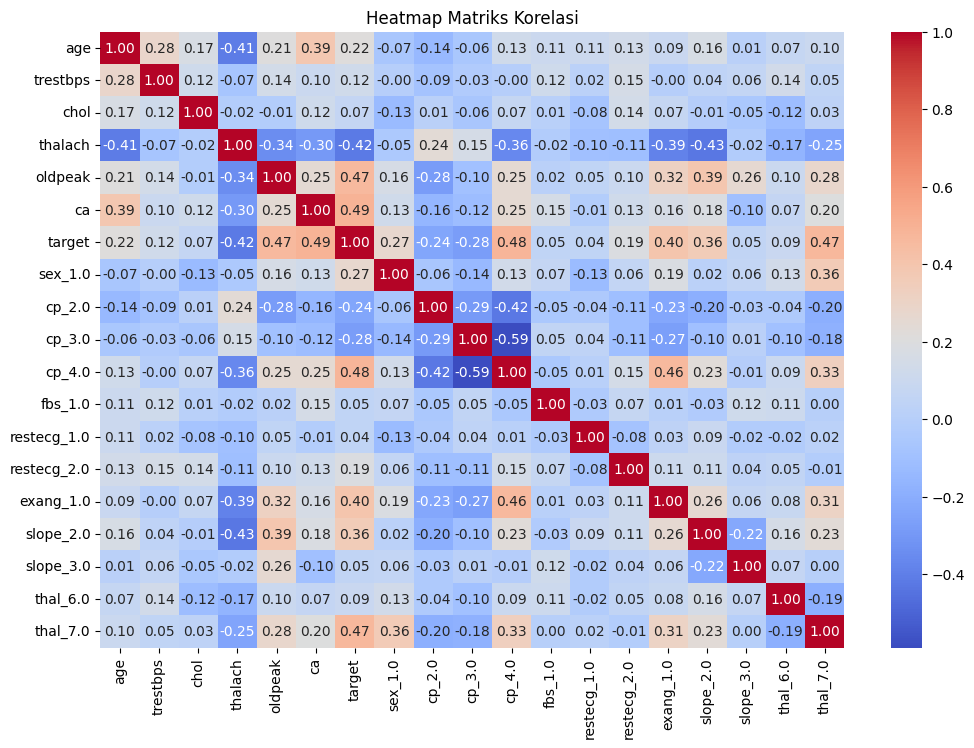


Ranking Fitur Berdasarkan Importance:
        Feature  Importance
3       thalach    0.129341
4       oldpeak    0.122526
2          chol    0.118710
0           age    0.114967
5            ca    0.101879
1      trestbps    0.097574
9        cp_4.0    0.064847
17     thal_7.0    0.064322
13    exang_1.0    0.038323
14    slope_2.0    0.031156
6       sex_1.0    0.026642
12  restecg_2.0    0.022441
10      fbs_1.0    0.019474
8        cp_3.0    0.017609
16     thal_6.0    0.011426
15    slope_3.0    0.009088
7        cp_2.0    0.008943
11  restecg_1.0    0.000731


<ipython-input-90-6b280476a087>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


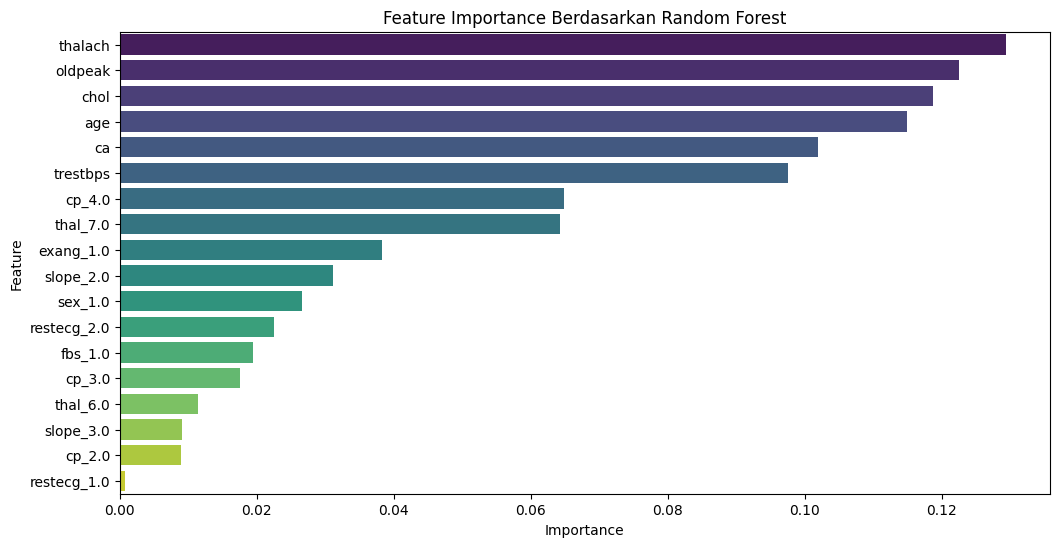

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 1. Correlation Matrix
print("Correlation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix['target'].sort_values(ascending=False))  # Korelasi terhadap target

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Matriks Korelasi")
plt.show()

# 2. Feature Importance menggunakan Random Forest
# Memisahkan fitur (X) dan target (y)
X = data.drop('target', axis=1)
y = data['target']

# Membuat model Random Forest untuk menghitung importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Mendapatkan ranking fitur berdasarkan importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRanking Fitur Berdasarkan Importance:")
print(feature_importances)

# Visualisasi feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance Berdasarkan Random Forest")
plt.show()


# Pembuatan Model Deep Learning

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.3569 - loss: 1.2592 - val_accuracy: 0.3358 - val_loss: 0.7226
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4115 - loss: 0.9505 - val_accuracy: 0.3504 - val_loss: 0.6954
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4132 - loss: 0.8950 - val_accuracy: 0.4161 - val_loss: 0.6635
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4153 - loss: 0.5678 - val_accuracy: 0.4453 - val_loss: 0.6237
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4437 - loss: -0.1702 - val_accuracy: 0.4453 - val_loss: 0.5790
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5323 - loss: -0.3818 - val_accuracy: 0.4380 - val_loss: 0.5337
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5251 - loss: -0.3019 - val_accuracy: 0.4234 - val_loss: 0.4844
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5897 - loss: -0.5929 - val_accuracy: 0.4307 - val_loss: 0.4345

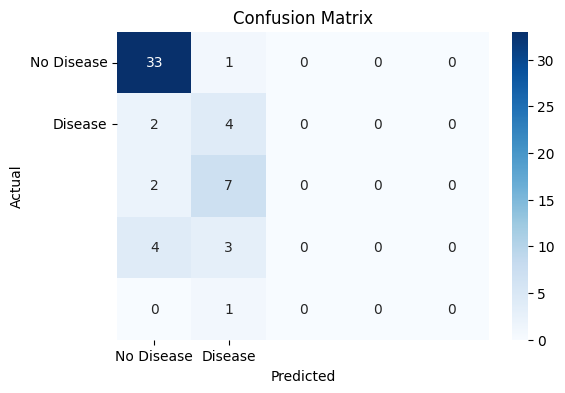


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        34
           1       0.25      0.67      0.36         6
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.65        57
   macro avg       0.21      0.33      0.25        57
weighted avg       0.51      0.65      0.56        57



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


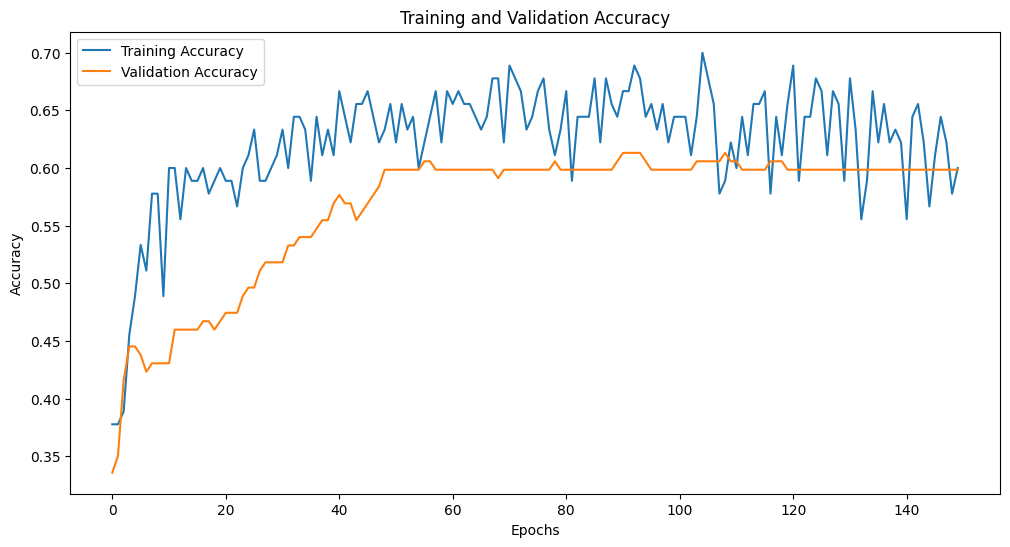

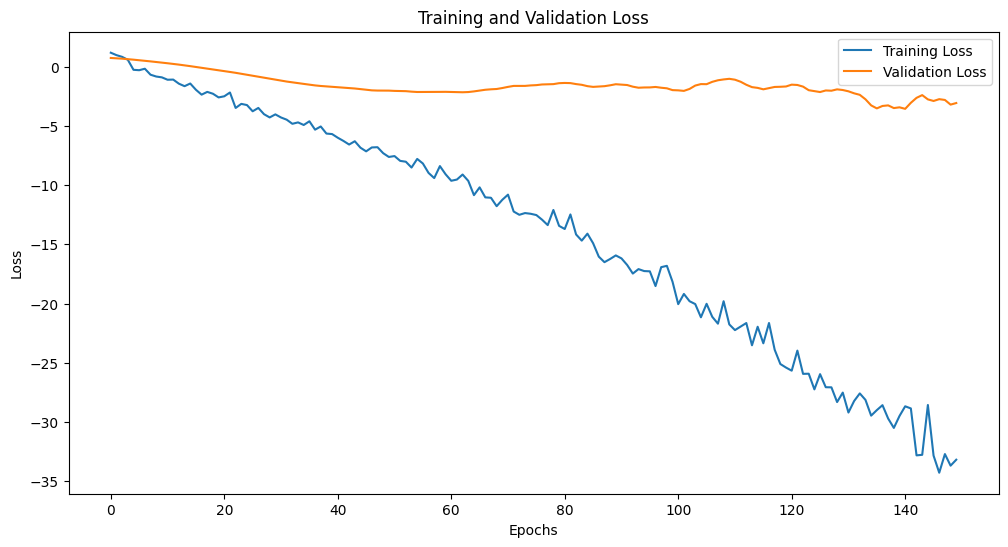

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pisahkan Fitur (X) dan Target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Membangun Model Deep Learning
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + Hidden layer 1
    BatchNormalization(),  # Normalisasi batch
    Dropout(0.4),  # Dropout untuk mencegah overfitting
    Dense(64, activation='relu'),  # Hidden layer 2
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer 3
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer (sigmoid untuk klasifikasi biner)
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimasi dengan learning rate lebih rendah
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Melatih Model
history = model.fit(
    X_train, y_train,
    validation_split=0.6,  # Gunakan 20% data training untuk validasi
    epochs=150,  # Jumlah epoch dilipatgandakan
    batch_size=32,  # Ukuran batch lebih besar
    verbose=1
)

# 4. Evaluasi Model
# Evaluasi pada testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTesting Accuracy: {accuracy:.4f}")

# Prediksi pada testing set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Laporan Klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Visualisasi Akurasi dan Loss
# Plot Akurasi
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


# Pelatihan lanjutan untuk model


In [ ]:
!pip install scikit-learn xgboost imbalanced-learn




Ensemble Model Accuracy: 0.88


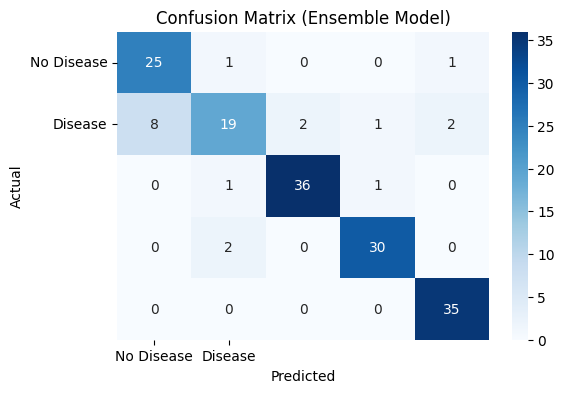


Classification Report (Ensemble Model):
              precision    recall  f1-score   support

           0       0.76      0.93      0.83        27
           1       0.83      0.59      0.69        32
           2       0.95      0.95      0.95        38
           3       0.94      0.94      0.94        32
           4       0.92      1.00      0.96        35

    accuracy                           0.88       164
   macro avg       0.88      0.88      0.87       164
weighted avg       0.88      0.88      0.88       164



In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100, random_state=42, max_depth=10, min_samples_split=5
)

# 2. Model XGBoost
xgb_model = XGBClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=10, eval_metric='logloss', random_state=42
)

# 3. Voting Classifier (Ensemble)
voting_clf = VotingClassifier(
    estimators=[('Random Forest', rf_model), ('XGBoost', xgb_model)],
    voting='soft'  # Menggunakan probabilitas untuk voting
)

# Latih Ensemble Model
voting_clf.fit(X_train, y_train)

# Evaluasi Ensemble Model
y_pred_ensemble = voting_clf.predict(X_test)

# Akurasi Model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"\nEnsemble Model Accuracy: {ensemble_accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Ensemble Model)")
plt.show()

# Classification Report
print("\nClassification Report (Ensemble Model):")
print(classification_report(y_test, y_pred_ensemble))


# Evaluasi Lanjutan dan Visualisasi

<ipython-input-96-3134f38bb34b>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linewidth=1, color='grey')  # Garis diagonal (baseline)


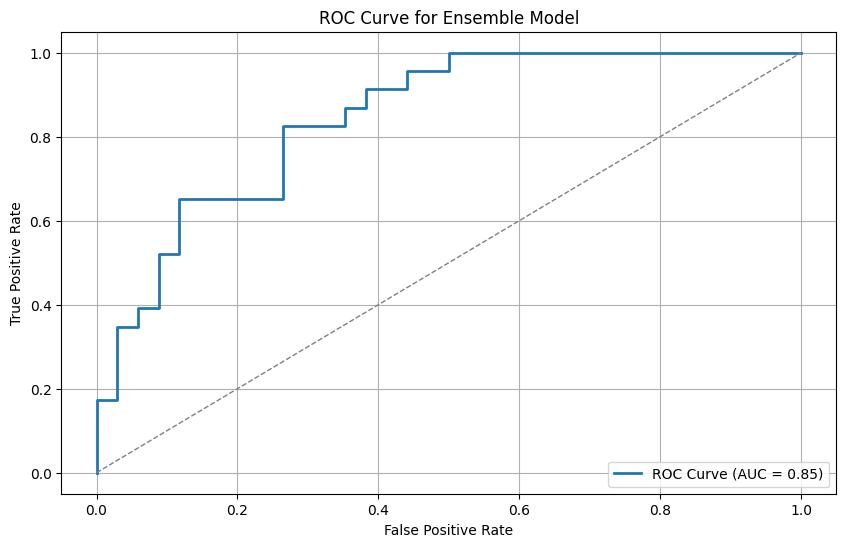

Distribusi y_test: (array([0, 1]), array([34, 23]))


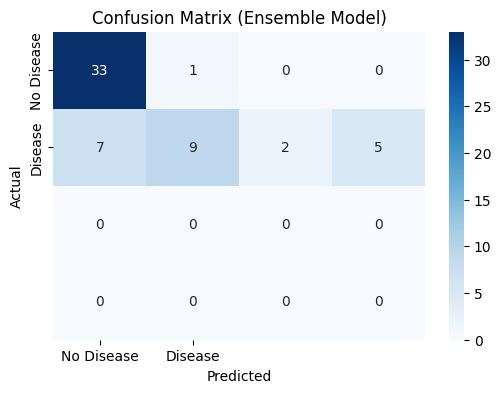


Classification Report (Ensemble Model):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        34
           1       0.90      0.39      0.55        23
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.74        57
   macro avg       0.43      0.34      0.36        57
weighted avg       0.86      0.74      0.75        57



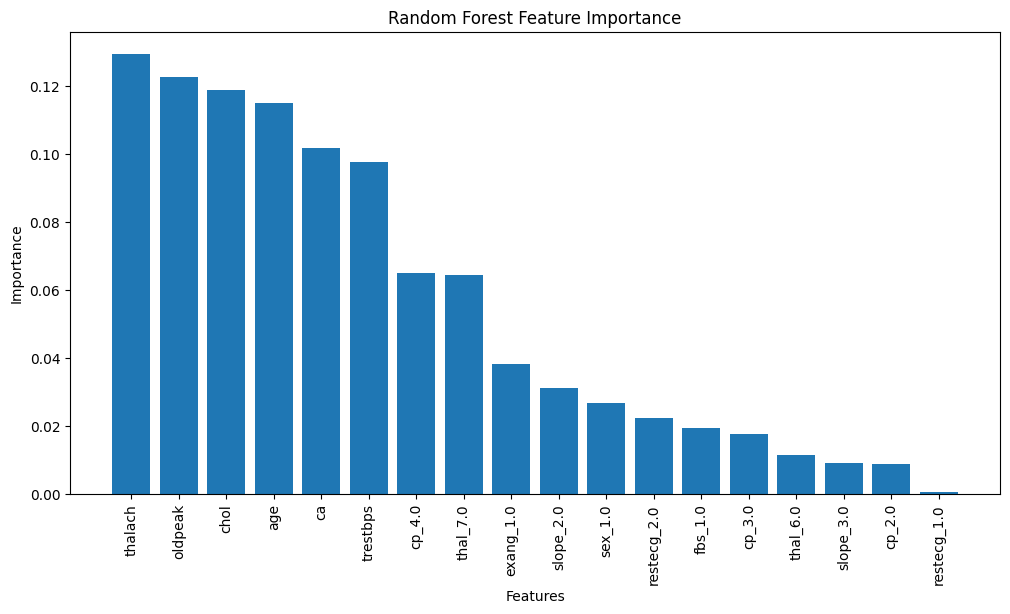

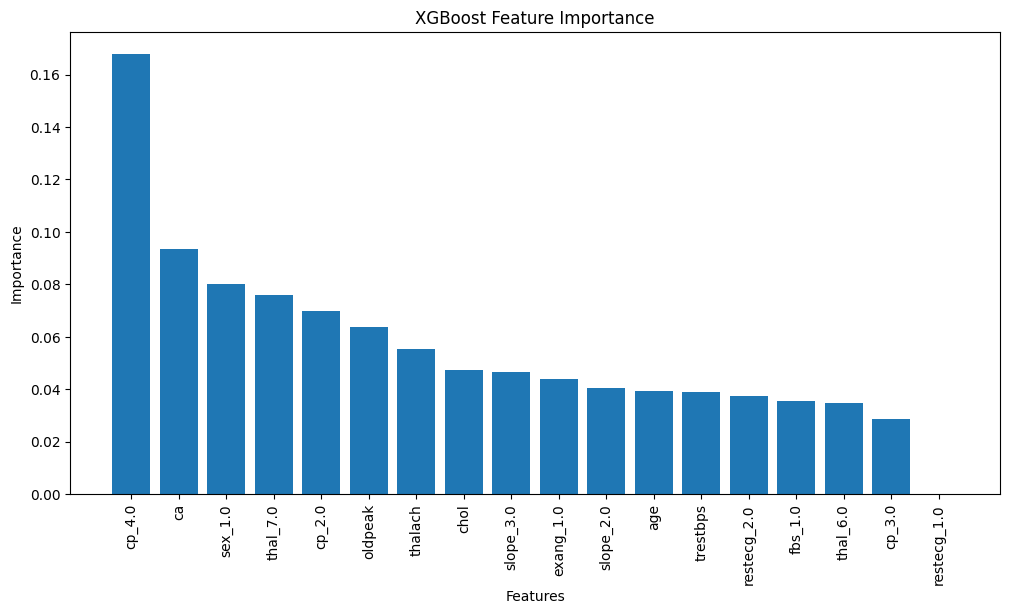

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Konversi y_test ke format integer dan pastikan hanya biner
y_test = y_test.astype(int)  # Pastikan tipe integer
y_test = np.where(y_test > 1, 1, y_test)  # Ubah kelas >1 menjadi 1 (jika multiclass)


# Pastikan prediksi probabilitas diambil untuk kelas positif (kelas 1)
y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc

# Hitung ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, color='grey')  # Garis diagonal (baseline)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Ensemble Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 2. Confusion Matrix
# Pastikan distribusi y_test seimbang
print("Distribusi y_test:", np.unique(y_test, return_counts=True))

conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Ensemble Model)")
plt.show()

# 3. Classification Report
# Menangani peringatan undefined metric dengan zero_division
print("\nClassification Report (Ensemble Model):")
print(classification_report(y_test, y_pred_ensemble, zero_division=0))

# 4. Feature Importance
# Latih model Random Forest jika belum dilatih
if not hasattr(rf_model, "feature_importances_"):
    rf_model.fit(X_train, y_train)  # Pastikan model telah dilatih

# Random Forest Feature Importance
rf_importances = rf_model.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

# Plot Random Forest Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(rf_importances)), rf_importances[rf_indices], align="center")
plt.xticks(range(len(rf_importances)), X.columns[rf_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# Latih model XGBoost jika belum dilatih
if not hasattr(xgb_model, "feature_importances_"):
    xgb_model.fit(X_train, y_train)  # Pastikan model telah dilatih

# XGBoost Feature Importance
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

# Plot XGBoost Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(xgb_importances)), xgb_importances[xgb_indices], align="center")
plt.xticks(range(len(xgb_importances)), X.columns[xgb_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("XGBoost Feature Importance")
plt.show()

# Dokumentasi Analisis dan Evaluasi Model

<ipython-input-97-d437a5ce1154>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linewidth=1, color='grey')  # Garis diagonal sebagai baseline


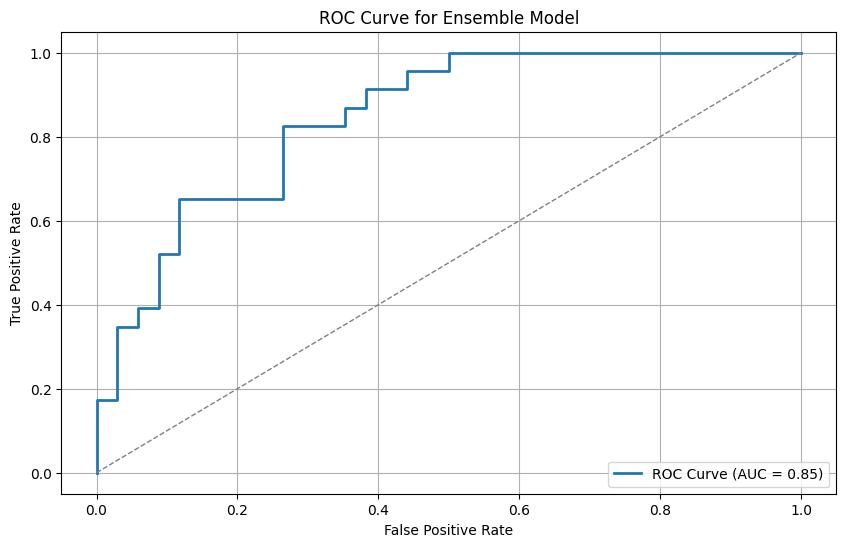

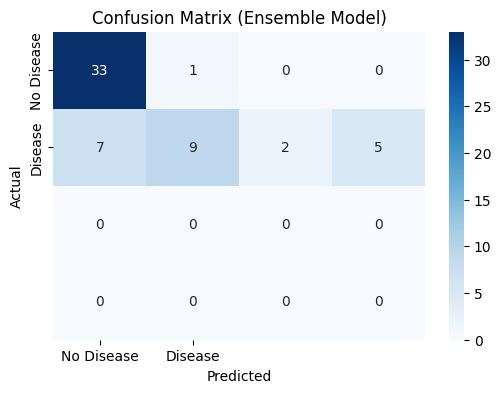


Classification Report (Ensemble Model):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        34
           1       0.90      0.39      0.55        23
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.74        57
   macro avg       0.43      0.34      0.36        57
weighted avg       0.86      0.74      0.75        57


Ensemble Model Accuracy: 0.74


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Training Accuracy: 1.00
Random Forest Testing Accuracy: 0.67

XGBoost Training Accuracy: 1.00
XGBoost Testing Accuracy: 0.74


In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluasi Performance Model Ensemble
# 1. ROC Curve dan AUC
y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, color='grey')  # Garis diagonal sebagai baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Ensemble Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Ensemble Model)")
plt.show()

# 3. Classification Report
print("\nClassification Report (Ensemble Model):")
print(classification_report(y_test, y_pred_ensemble))

# 4. Akurasi Model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"\nEnsemble Model Accuracy: {ensemble_accuracy:.2f}")

# 5. Analisis Overfitting
# Latih ulang Random Forest dan XGBoost jika perlu untuk membandingkan akurasi training dan testing
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Akurasi Random Forest dan XGBoost pada training dan testing
rf_train_accuracy = rf_model.score(X_train, y_train)
rf_test_accuracy = rf_model.score(X_test, y_test)

xgb_train_accuracy = xgb_model.score(X_train, y_train)
xgb_test_accuracy = xgb_model.score(X_test, y_test)

# Tampilkan hasil akurasi untuk deteksi overfitting
print(f"\nRandom Forest Training Accuracy: {rf_train_accuracy:.2f}")
print(f"Random Forest Testing Accuracy: {rf_test_accuracy:.2f}")

print(f"\nXGBoost Training Accuracy: {xgb_train_accuracy:.2f}")
print(f"XGBoost Testing Accuracy: {xgb_test_accuracy:.2f}")
